In [2]:
# fcn 32s
# 直接从 pool5 上采样（反卷级）到原尺寸
# 5 layers
from keras.models import Model, Sequential
from keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, Dropout, UpSampling2D
from keras.layers import Input, ZeroPadding2D, BatchNormalization, Activation

def conv2d_bn(input, nums_kernal, size, strides=1, padding = 'same'):
    x = Conv2D(nums_kernal, size, padding=padding, strides=strides)(input)
    x = BatchNormalization()(x)
    return Activation('relu')(x)

def conv2d_bn(input, nums_kernal, size, strides=1, padding = 'same'):
    x = Conv2D(nums_kernal, size, padding=padding, strides=strides)(input)
    x = BatchNormalization()(x)
    return Activation('relu')(x)

# model = Sequential()
# preprocessing
input_width = 224
input_height = 224
input = Input(shape=(input_width,input_height,3))
#x = ZeroPadding2D(100)(input)
# layer1 2conv  1/2
x = conv2d_bn(input, 64, (3,3))
x = conv2d_bn(x, 64, (3,3))
pool1 = MaxPooling2D()(x)

# layer2 2conv 1/4
x = conv2d_bn(pool1, 128, (3,3))
x = conv2d_bn(x, 128, (3,3))
pool2 = MaxPooling2D()(x)

# layer3 3conv 1/8
x = conv2d_bn(pool2, 256, (3,3))
x = conv2d_bn(x, 256, (3,3))
x = conv2d_bn(x, 256, (3,3))
pool3 = MaxPooling2D()(x)

# layer4 3conv 1/16
x = conv2d_bn(pool3, 256, (3,3))
x = conv2d_bn(x, 256, (3,3))
x = conv2d_bn(x, 256, (3,3))
pool4 = MaxPooling2D()(x)

# layer5 3conv 1/32
x = conv2d_bn(pool4, 256, (3,3))
x = conv2d_bn(x, 256, (3,3))
x = conv2d_bn(x, 256, (3,3))
pool5 = MaxPooling2D()(x)

# layer6 2full
full_1 = conv2d_bn(pool5, 4096, (1,1), padding='valid')
drop_1 = Dropout(0.5)(full_1)
full_2 = conv2d_bn(drop_1, 4096, (1,1), padding='valid')
drop_2 = Dropout(0.5)(full_2)

drop_2_n = conv2d_bn(drop_1, 21, (1,1), padding='valid')
deconv_1 = Conv2DTranspose(21, (64,64), strides=32)(drop_2_n)

#ratio = (input.shape[1].value/drop_2_n.shape[1].value, input.shape[2].value/drop_2_n.shape[2].value)
#ratio = (input.shape[1]/drop_2_n[1], input.shape[2]/drop_2_n[2])
#print(ratio)
#bilinear_inter_1 = UpSampling2D(ratio)(drop_2_n)

output=Activation('softmax')(deconv_1)

model = Model(input, output, name='fcn_net')
model.summary()

(?, 224, 224, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_17 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
activation_18 (Activation)   (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_18 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
activation_19 (Activation)   (None, 224, 224, 64)      0   

/home/super-workstation/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Update your `Conv2DTranspose` call to the Keras 2 API: `Conv2DTranspose(21, (64, 64), strides=32)`


<class 'dict'>
(1, 1)
[[array([[4]], dtype=uint8)]]
info:
image size -->  375 x 500


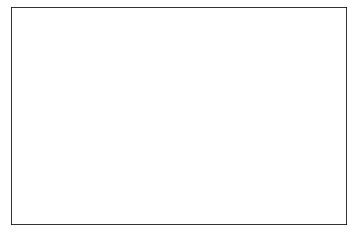

[[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]]


In [22]:
# read dataset pascal
image_dir = "/home/super-workstation/Data/pascal/benchmark_RELEASE/dataset/cls/2008_000007.mat"

import scipy.io as scio
data = scio.loadmat(image_dir)
print(type(data))
st = data['GTcls']
seg = st['Segmentation']
print(seg.shape)
cater_current = st['CategoriesPresent']
print(cater_current)
#for key, value in data.iteritems() :
#    print(key, value)

import sys
#print(sys.path)
sys.path.insert(0, '../')
from dpl import utils
image = seg[0][0]
utils.showSingleImage(image)
print(seg)
